In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load in dialogue data
df = pd.read_csv('All-seasons.csv')
df.Line = df.Line.str.replace('\n', '')
df.head()

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away."
1,10,1,Kyle,Going away? For how long?
2,10,1,Stan,Forever.
3,10,1,Chef,I'm sorry boys.
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."


In [2]:
#Let's look at the number of Seasons included in this data set
print('The seasons in the data set are {}'.format(df.Season.unique()))

The seasons in the data set are ['10' 'Season' '11' '12' '13' '14' '15' '16' '17' '18' '1' '2' '3' '4' '5'
 '6' '7' '8' '9']


We have all dialogues from seasons 1 to 18 this will be fun exploring different speaking patterns of characters.

Let's see who has the most lines through out all of southpark

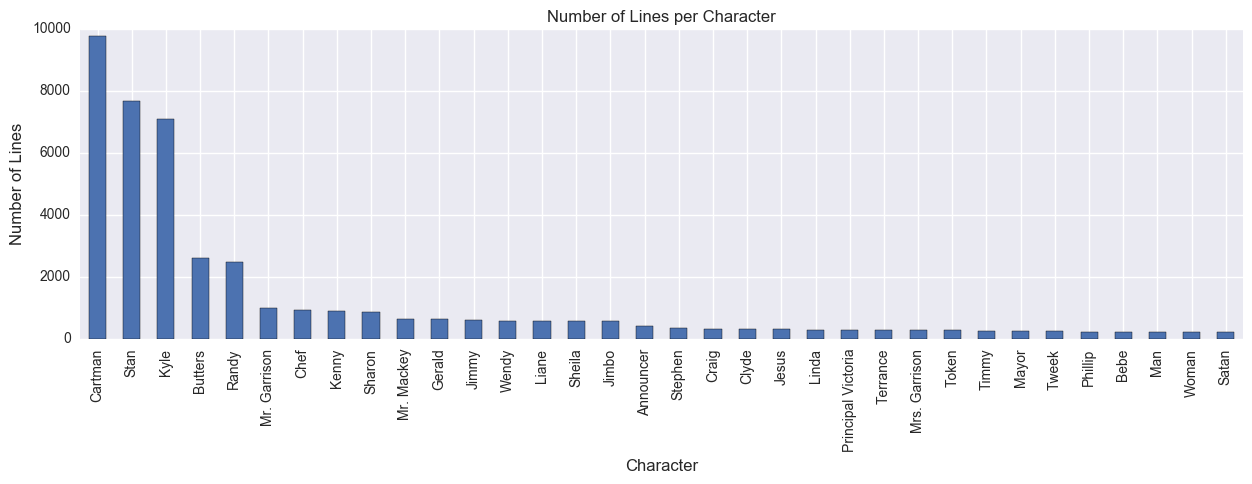

In [3]:
plt.figure(figsize=(15,4))
lines = pd.value_counts(df.Character.values, sort=True)
lines[lines>200].sort_values(ascending=False).plot(kind='bar')#only get characters with more than 50 lines
plt.ylabel('Number of Lines',fontsize=12)
plt.xlabel('Character',fontsize=12)
plt.title('Number of Lines per Character',fontsize=12)
plt.show()

We can see that Cartman, Stan and Kyle are the man characters with Butters and Randy following are 4th and 5th.

Let's see on average how many sentences are in each line for a Character

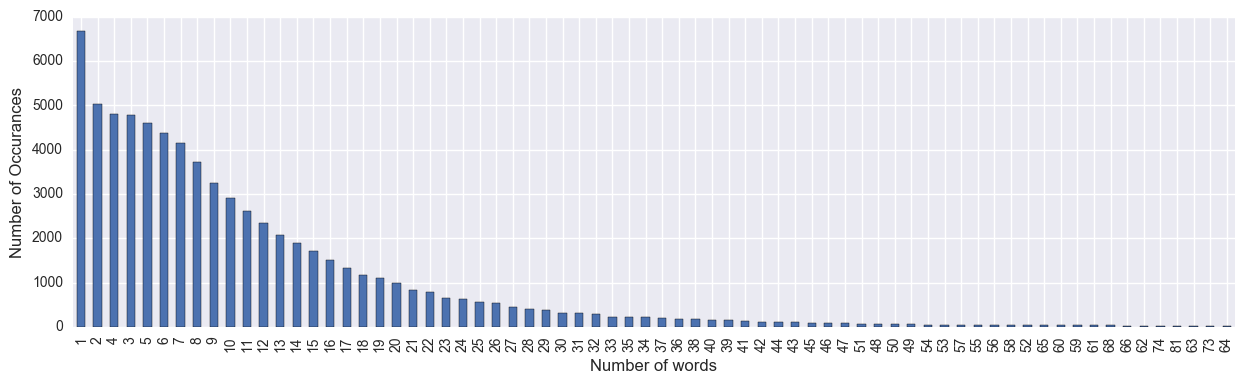

In [58]:
#create column that has number of sentences for a line
import nltk
df['num_words'] = df.Line.apply(lambda x : len(x.split()))
wordCount = pd.value_counts(df.num_words,sort=True)
plt.figure(figsize=(15,4))
wordCount[wordCount>20].plot(kind ='bar')
plt.ylabel('Number of Occurances',fontsize=12)
plt.xlabel('Number of words',fontsize=12)
plt.show()

The majority of lines are only 1 or 2 words let's see what the majority of these one liners are

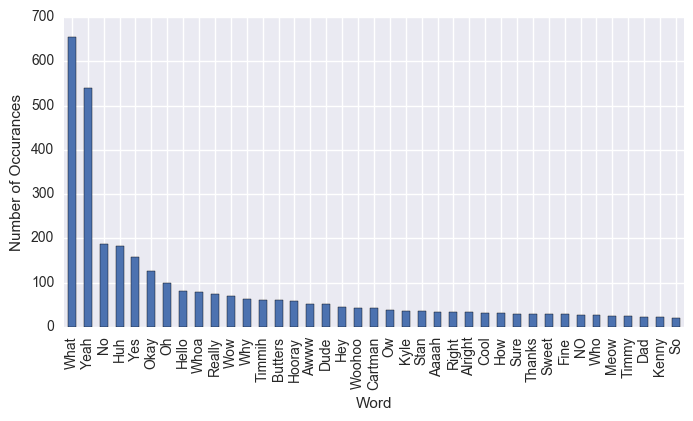

In [59]:
import re
oneWord = pd.value_counts(df[df.num_words==1].Line.apply(lambda x:re.sub(r'\W+', '', x)),sort=True)
plt.figure(figsize=(8,4))
oneWord[oneWord>20].plot(kind='bar')
plt.ylabel('Number of Occurances')
plt.xlabel('Word')
plt.show()

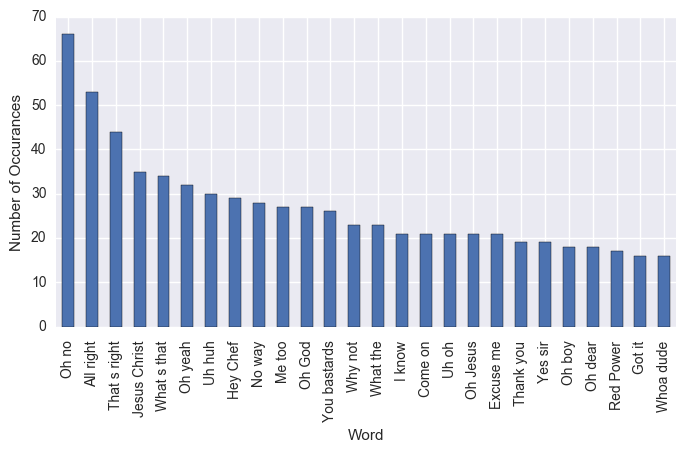

In [68]:
import re
twoWords = pd.value_counts(df[df.num_words==2].Line.apply(lambda x:re.sub(r'\W+', ' ', x)),sort=True)
plt.figure(figsize=(8,4))
twoWords[twoWords>15].plot(kind='bar')
plt.ylabel('Number of Occurances')
plt.xlabel('Word')
plt.show()